# Visualize Decision tree

![linear regression](https://images.unsplash.com/reserve/bOvf94dPRxWu0u3QsPjF_tree.jpg?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=876&q=80)

photo by [Johann Siemens](https://unsplash.com/@emben) at [Unsplash](https://unsplash.com/)

## Introduction

this is the companion colab code for my tutorial in medium about Visualize decision trees in Python , please read the article for better understanding of the code. In the article I discuss about the theory, the libraries and how efficiently use. Here I am providing just generic information about the algorithm and the code. 
this is a colab notebook, you can test in colab (all the code has been tested and you do not need to set your machine)

[Medium article about Least squares regression math](https://)



note: the articles will be publish soon

for other stories check my medium profile:
[Salvatore Raieli](https://salvatore-raieli.medium.com/)


## scikit-learn

Sciki-learn has a specific function to visualize tree, plot-tree. We can access the structure of the tree, and with this function we can plot it. Notice that is also provide different information about number of samples at that node, impurity measurement (gini in this case), and number of samples of each class (value)

[link to the function](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html)

In [1]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore") 

[Text(209.25, 475.65000000000003, 'petal width (cm) <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa'),
 Text(139.5, 339.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa'),
 Text(279.0, 339.75, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = versicolor'),
 Text(139.5, 203.85000000000002, 'petal length (cm) <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = versicolor'),
 Text(69.75, 67.94999999999999, 'gini = 0.041\nsamples = 48\nvalue = [0, 47, 1]\nclass = versicolor'),
 Text(209.25, 67.94999999999999, 'gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]\nclass = virginica'),
 Text(418.5, 203.85000000000002, 'petal length (cm) <= 4.85\ngini = 0.043\nsamples = 46\nvalue = [0, 1, 45]\nclass = virginica'),
 Text(348.75, 67.94999999999999, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]\nclass = virginica'),
 Text(488.25, 67.94999999999999, 'gini = 0.0\nsamples = 43\nvalue = [0, 0, 43]\nclass = virginica')]

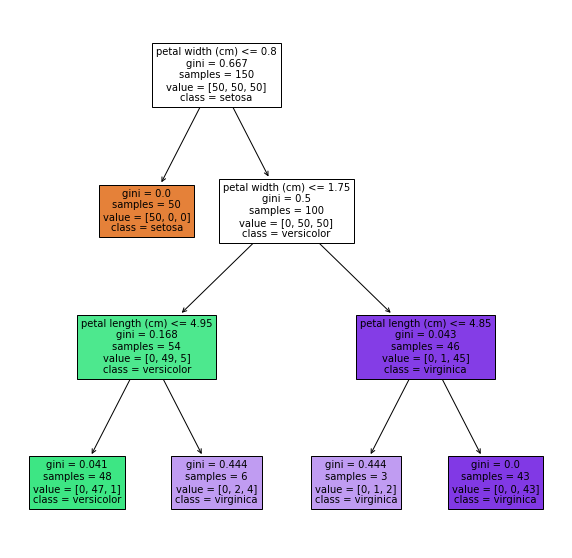

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
fig = plt.figure(figsize = (10,10))
# Training classifiers
clf = DecisionTreeClassifier(max_depth = 3)
clf.fit(X, y)
plot_tree(clf, 
          feature_names = iris.feature_names,
          class_names= iris.target_names,
          fontsize = 10,
          filled=True)


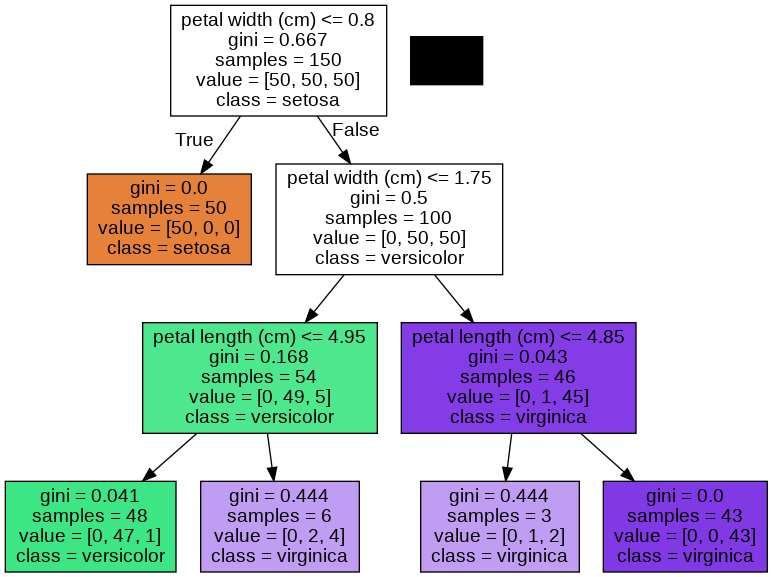

In [3]:
#alternative visualization
import pydotplus 
from IPython.display import Image
from sklearn import tree

dot_data = tree.export_graphviz(clf, 
                                feature_names=iris.feature_names, 
                                class_names=iris.target_names, 
                                filled=True, 
                                out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

we can also use text representation, sometimes text representation is easier to understand and from this we can derive decision rules

In [5]:
text_representation = tree.export_text(clf, feature_names=iris.feature_names)
print(text_representation)


|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



In [5]:
#if you want to save the text
with open("decistion_tree_text.log", "w") as fout:
    fout.write(text_representation)


## dtreeviz

A library for tree visualization, you can find in the link more information about (additional plots, customization and so on). Dtreviz is library to visualize decision tree (classification, regression and also ensemble methods like random-forest).

[official documentation](https://github.com/parrt/dtreeviz)

Installation can be a little bit complex (it can give errors) the following cell should work for the installation in Colab.

In [5]:
#to install in colab
import sys

if 'google.colab' in sys.modules:
  !pip install -q dtreeviz

import sys
import os
# add library module to PYTHONPATH
sys.path.append(f"{os.getcwd()}/../")



     |████████████████████████████████| 62 kB 627 kB/s 


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


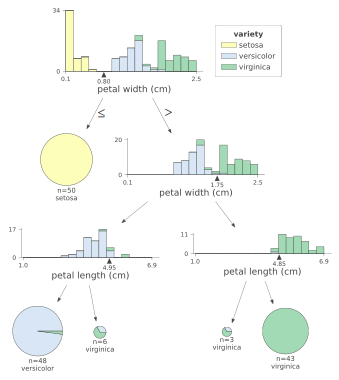

In [6]:
from dtreeviz.trees import *
import graphviz
from IPython.display import Image, display_svg, SVG
clf = tree.DecisionTreeClassifier(max_depth=3)  # limit depth of tree
iris = datasets.load_iris()
clf.fit(iris.data, iris.target)

viz = dtreeviz(clf, 
               iris.data, 
               iris.target,
               target_name='variety',
               feature_names=iris.feature_names, 
               class_names=["setosa", "versicolor", "virginica"]  # need class_names for classifier
              )  
              
viz

**Orientation**

you can change the orientation of the plot with the parameter orientation, to dislay to left to right use orientation = "LR"

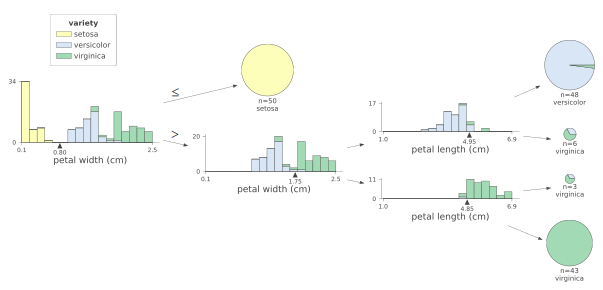

In [7]:
viz = dtreeviz(clf, 
               iris.data, 
               iris.target,
               target_name='variety',
               feature_names=iris.feature_names, 
               class_names=["setosa", "versicolor", "virginica"],
               orientation = "LR"
              )  
              
viz

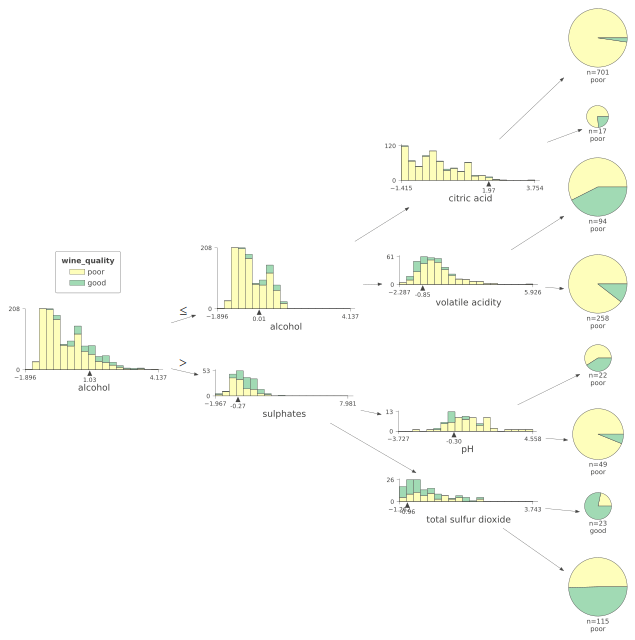

In [8]:
#we know use the wine dataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
white = "https://raw.githubusercontent.com/SalvatoreRa/tutorial/main/datasets/winequality-red.csv"
white = pd.read_csv(white, sep = ";")
#binarize the target variable
white["wine_quality"] = [1 if x>6 else 0 for x in white.quality]
#separing the input features from the target variable
y_w = white["wine_quality"]
X_w = white.drop(["quality", "wine_quality"], axis=1)
#stratify training and test set
X_train, X_test, y_train, y_test = train_test_split(X_w , y_w, 
                                                        test_size = 0.2, #test size would be 20%
                                                        random_state = 42, #42 is for good luck!
                                                        stratify = y_w) #stratify is for balancing the categories in the sampling

#scaling the white
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) #this to avoid information leakage

#training a classifier, we use here random forest
clf = tree.DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)
#visualize the tree
viz = dtreeviz(clf, 
               X_train, 
               y_train,
               target_name='wine_quality',
               feature_names=X_w.columns, 
               class_names=["poor", "good"],  # need class_names for classifier
               orientation = "LR"
              )  
              
viz

**Prediction path**

We can highlight the decision path for a single observation, let's select one random. We have to provide a single observation. This is really useful if you want to show why your model is predicting a certain outcome. 

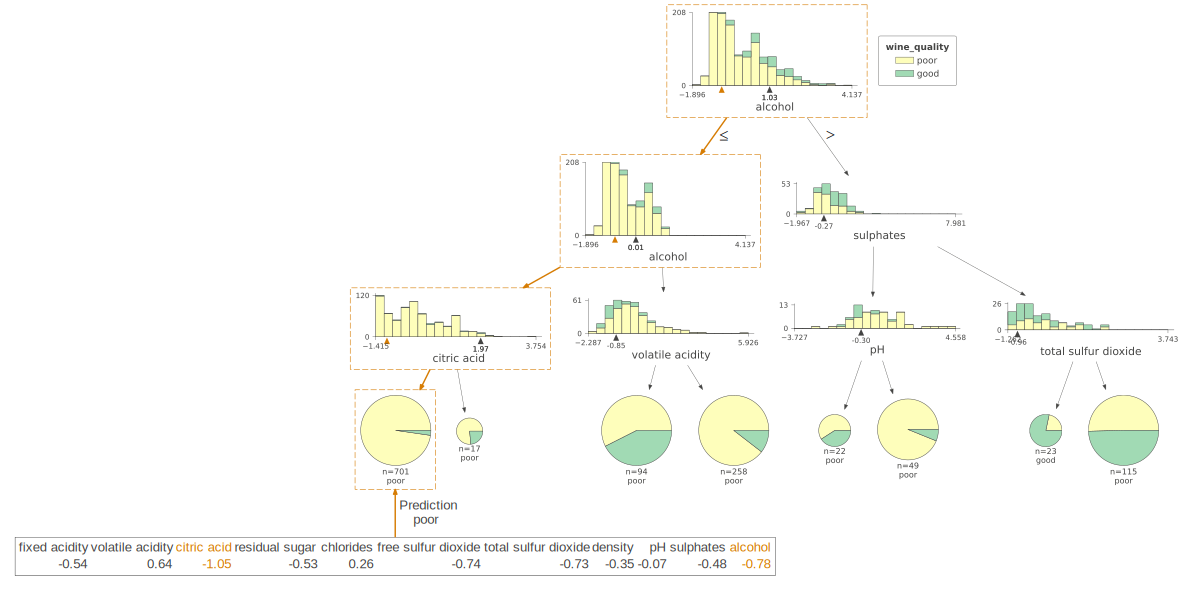

In [11]:
#random selection from the training 
n = np.random.randint(0, len(X_train))
X = X_train[n,:]  


#visualize the tree
viz = dtreeviz(clf, 
               X_train, 
               y_train,
               target_name='wine_quality',
               feature_names=X_w.columns, 
               class_names=["poor", "good"],  # need class_names for classifier
               #orientation = "LR",
               X=X, #here we provide the observation
               scale = 1.2
              )  
              


viz

You can also visualize also only the path, using the  argument *show_just_path=True*


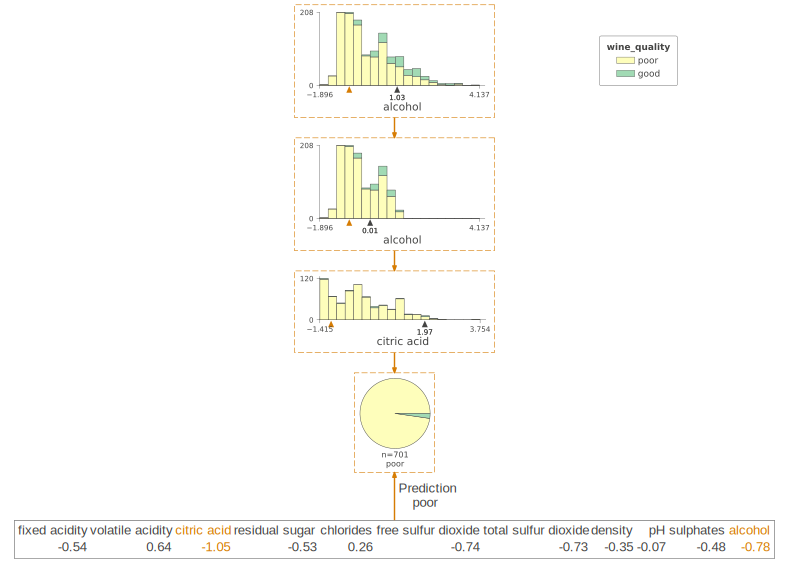

In [13]:
#visualize the tree
viz = dtreeviz(clf, 
               X_train, 
               y_train,
               target_name='wine_quality',
               feature_names=X_w.columns, 
               class_names=["poor", "good"],  # need class_names for classifier
               #orientation = "LR",
               X=X, #here we provide the observation
               show_just_path=True, #just show the path
               scale = 1.2
              )  
              


viz

**Visualize decision boundaries**

notice we are limiting to two variables.

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


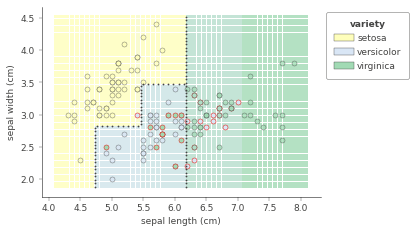

In [14]:
from dtreeviz import clfviz
clf = tree.DecisionTreeClassifier(max_depth=3)  # limit depth of tree
iris = datasets.load_iris()
#select only two variables
X = iris.data[:, 0:2]
y = iris.target
clf.fit(X,y)

viz = clfviz(clf, 
               X, 
               y,
               target_name='variety',
               feature_names=iris.feature_names[0:2], 
               class_names=["setosa", "versicolor", "virginica"]  # need class_names for classifier
              )  
              
viz

**Regression tree**

You can also visualize regression tree

In [15]:
data_dir = "https://raw.githubusercontent.com/SalvatoreRa/tutorial/main/datasets/Boston.csv"
df = pd.read_csv(data_dir)
y = df["medv"]
X = df.drop(["medv"], axis=1)

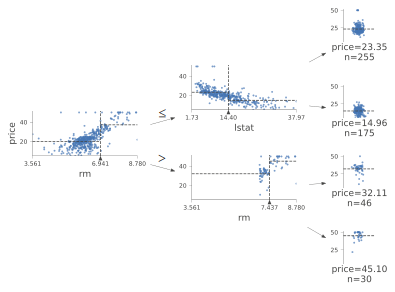

In [16]:
from sklearn import tree
regr = tree.DecisionTreeRegressor(max_depth=2)
regr.fit(X, y)

viz = dtreeviz(regr,
               X,
               y,
               target_name='price',
               feature_names=X.columns,
               orientation = "LR")
              
viz             

In [ ]:
#to save the plot
viz.save_svg()

**Regression bivariate feature-target space**

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


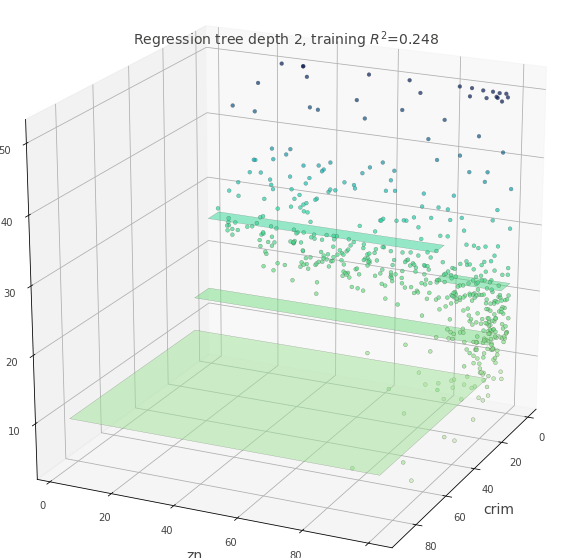

In [17]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.tree import DecisionTreeRegressor
from dtreeviz.trees import *

#select only two inputs variable
y = df["medv"]
X = df[['crim', 'age']]

regr = tree.DecisionTreeRegressor(max_depth=2)
regr.fit(X, y)

figsize = (10,10)
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111, projection='3d')

viz = rtreeviz_bivar_3D(regr,
               X,
               y,
               target_name='price',
               feature_names=['crim', 'zn'],
               fontsize=14,
               elev=20,
               azim=25,
               dist=8.2,
               show={'splits','title'},
               ax=ax)
              
plt.show() 

## tensorflow decision forests

this library has been created for training decision tree using tensorflow, you can use to train, predict and visualize the model.

you can read here the official documentation:
[official documentation](https://www.tensorflow.org/decision_forests)

printing the model is providing a lot of information that you can check (I commented that line of code but you can try).

The plot is informative and interactive, you can also hoover over it.


In [9]:
%%capture

!pip install tensorflow_decision_forests

In [11]:
#check available models
import tensorflow_decision_forests as tfdf
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

In [19]:
import tensorflow_decision_forests as tfdf
import pandas as pd

white = "https://raw.githubusercontent.com/SalvatoreRa/tutorial/main/datasets/winequality-red.csv"
white = pd.read_csv(white, sep = ";")
#binarize the target variable
white["wine_quality"] = ["Good" if x>6 else "poor" for x in white.quality]
dataset = white.drop(["quality"], axis=1)
tf_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(dataset, label="wine_quality")

model = tfdf.keras.CartModel()
model.fit(tf_dataset)

#you can print also the model summary is providing a lot of interesting information
#print(model.summary())
tfdf.model_plotter.plot_model_in_colab(model)




Use /tmp/tmp7juahzhi as temporary training directory
Starting reading the dataset
1/2 [==============>...............] - ETA: 13s
Dataset read in 0:00:13.784289
Training model
Model trained in 0:00:00.012301
Compiling model
2/2 [==============================] - 14s 38ms/step


## PyBoababdt

Thit is a new library that recently come out, check the official documentation. The package is providing visualization for decision tree

[official documentation](https://pypi.org/project/pybaobabdt/)

for more information you can also check the original article.
[Article](https://ieeexplore.ieee.org/document/6102453)

In [12]:
#installing
#pygraphviz is giving error in installation in colab but this should work
%%capture
!pipinstall python-graphviz 
!pipinstall pydot
!apt install libgraphviz-dev
!pip install pygraphviz   
!pip install pybaobabdt

In [21]:
#test if you can import it
import pybaobabdt 

<Figure size 6000x6000 with 0 Axes>

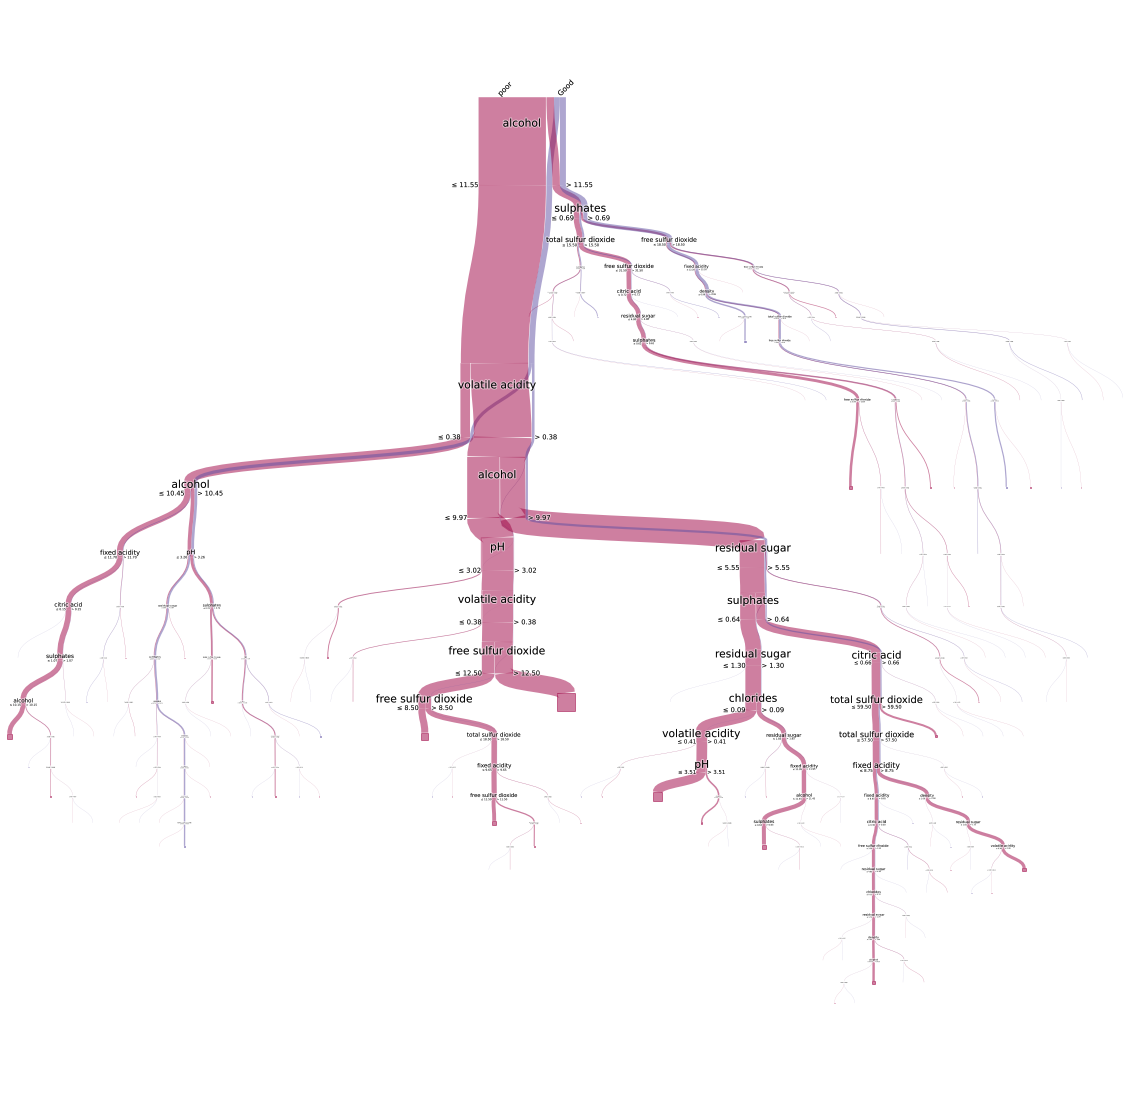

In [13]:
import pybaobabdt 
import pygraphviz 
white = "https://raw.githubusercontent.com/SalvatoreRa/tutorial/main/datasets/winequality-red.csv"
white = pd.read_csv(white, sep = ";")
#binarize the target variable
white["wine_quality"] = ["Good" if x>6 else "poor" for x in white.quality]
#separing the input features from the target variable
y_w = list(white["wine_quality"].str.encode('utf-8') )
X_w = white.drop(["quality", "wine_quality"], axis=1)

clf = tree.DecisionTreeClassifier()
clf.fit(X_w, y_w)
ax = pybaobabdt.drawTree(clf, size=20, dpi=300, 
                         features=X_w.columns,
                         ratio=0.8,colormap='Spectral')

<Figure size 6000x6000 with 0 Axes>

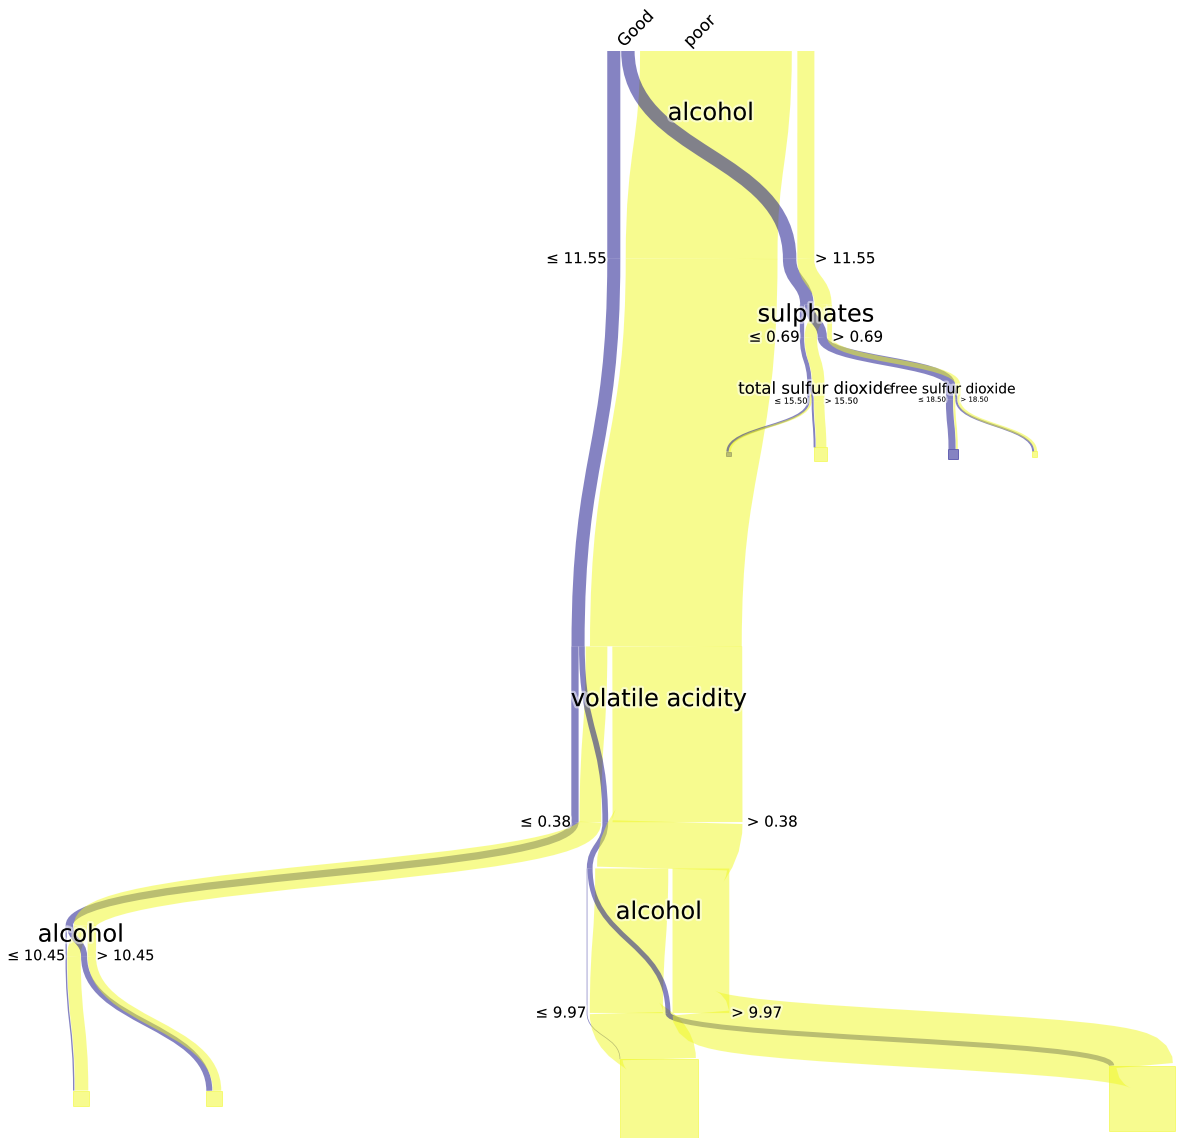

In [14]:
clf = tree.DecisionTreeClassifier(max_depth = 3)
clf.fit(X_w, y_w)
ax = pybaobabdt.drawTree(clf, size=20, dpi=300, 
                         features=X_w.columns,
                         ratio=0.8,
                         colormap='plasma') #you can customize using different colormap

we can use the wine dataset for multi-class classification, in this case we are not binarize the target variable.

<Figure size 1440x1440 with 0 Axes>

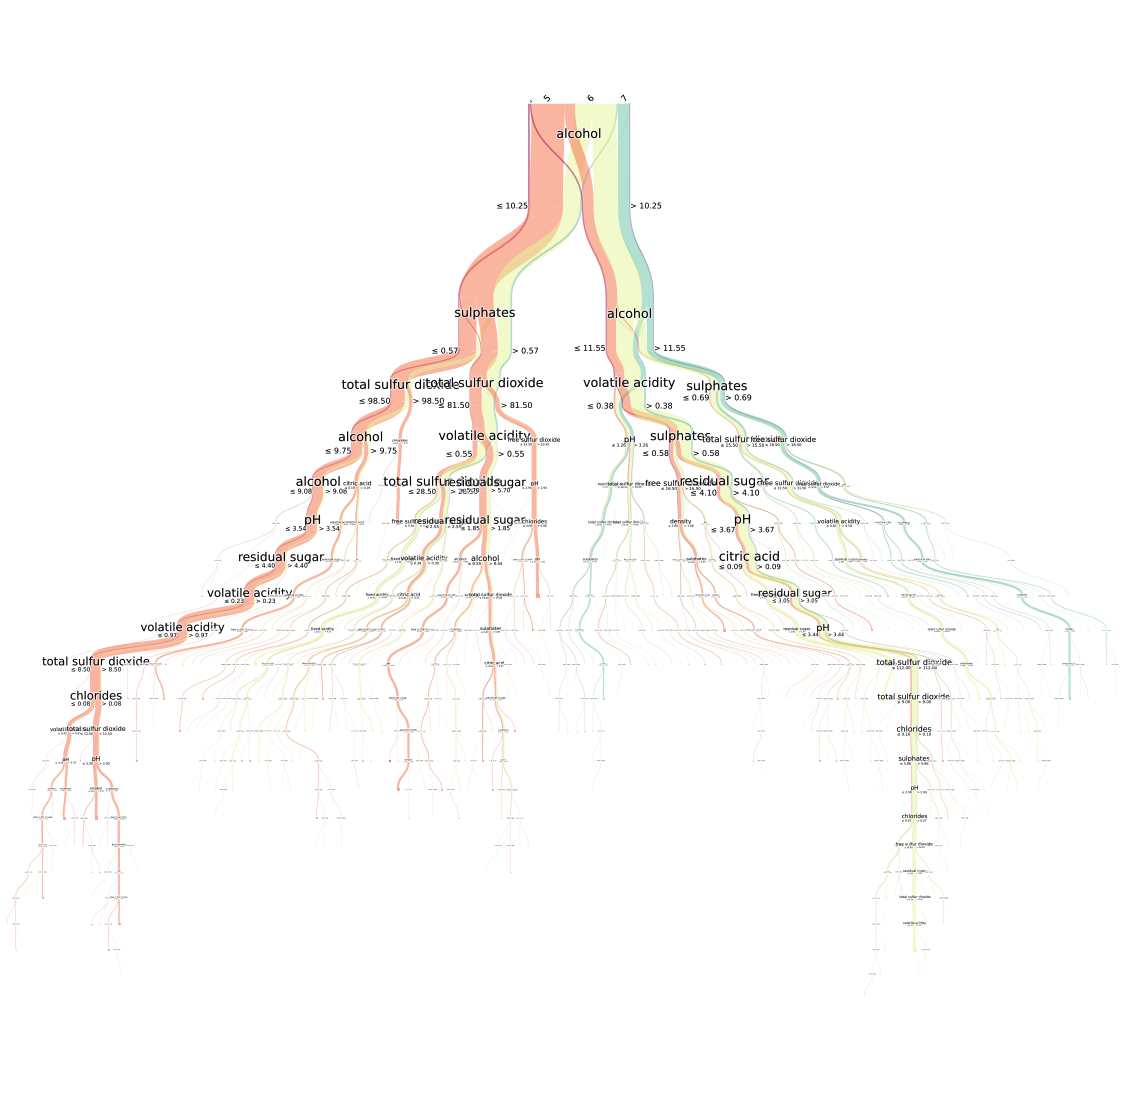

In [22]:

#separing the input features from the target variable
y_w  = [str(i).encode('utf-8') for i in list(white["quality"]) ]
X_w = white.drop(["quality", "wine_quality"], axis=1)

clf = tree.DecisionTreeClassifier()
clf.fit(X_w, y_w)
ax = pybaobabdt.drawTree(clf, size=20, dpi=300, 
                         features=X_w.columns,
                         ratio=0.8,colormap='Spectral')

<Figure size 1440x1440 with 0 Axes>

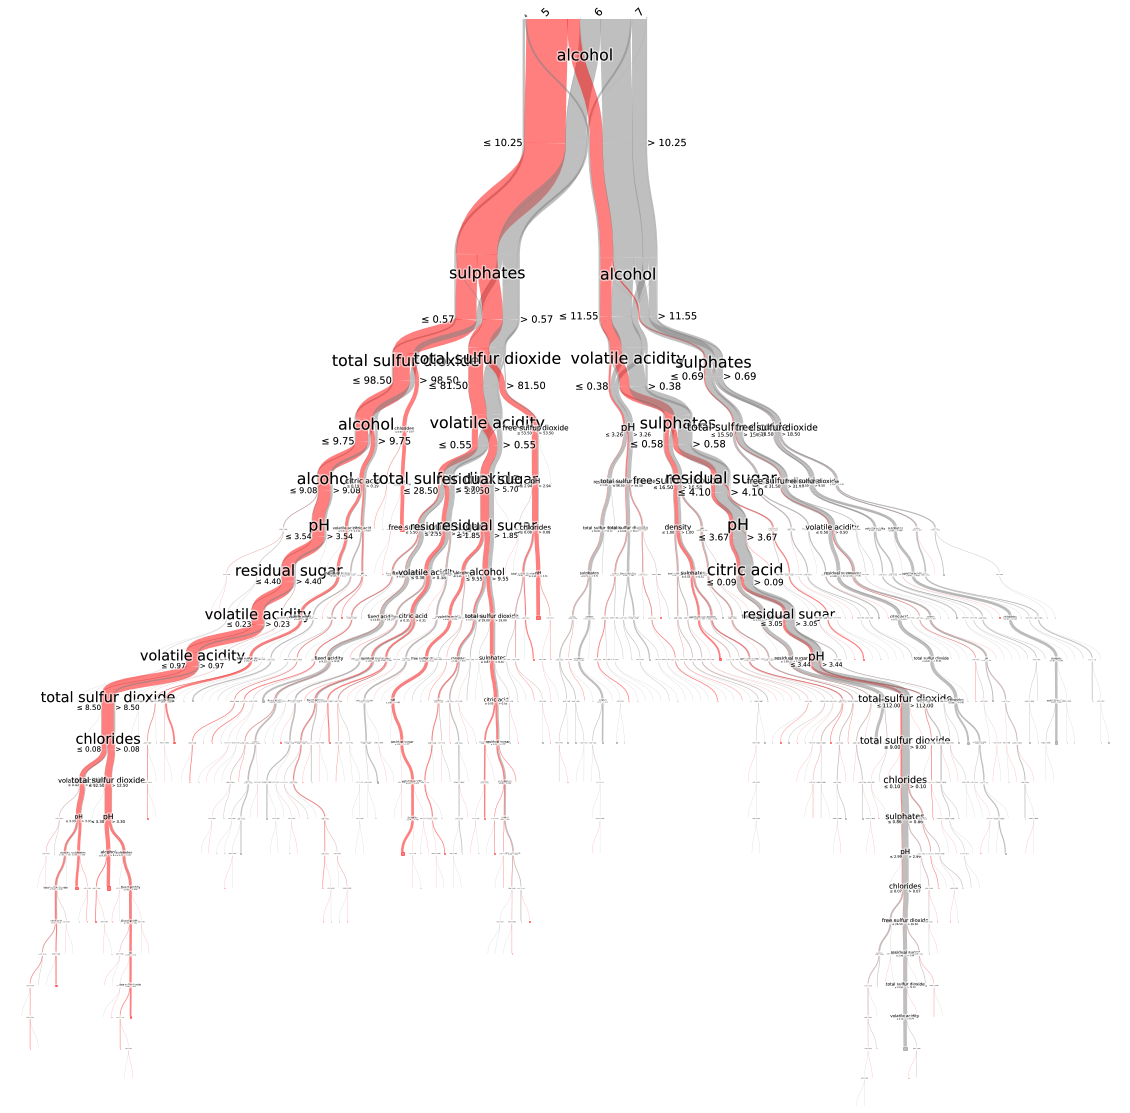

In [29]:
#highlight only one class
from matplotlib.colors import ListedColormap
colors = ["gray", "red","gray", "gray", "gray", "gray",]
colorMap = ListedColormap(colors)

ax = pybaobabdt.drawTree(clf, size=20, dpi=72, features=X_w.columns, colormap=colorMap)

In [29]:
#saving

ax.get_figure().savefig('tree.png', format='png', dpi=300, transparent=True)

